# Drug Synergy Prediction Task

**Definition:** Synergy is a dimensionless measure of deviation of an observed drug combination response from the expected effect of non-interaction. Synergy can be calculated using different models such as the Bliss model, Highest Single Agent (HSA), Loewe additivity model and Zero Interaction Potency (ZIP). Another relevant metric is CSS which measures the drug combination sensitivity and is derived using relative IC50 values of compounds and the area under their dose- response curves.

**Impact:** Drug combination therapy offers enormous potential for expanding the use of existing drugs and in improving their efficacy. For instance, the simultaneous modulation of multiple targets can address the common mechanisms of drug resistance in the treatment of cancers. However, experimentally exploring the entire space of possible drug combinations is not a feasible task. Computational models that can predict the therapeutic potential of drug combinations can thus be immensely valuable in guiding this exploration.

**Generalization:** It is important for model predictions to be able to adapt to varying underlying biology as captured through different cell lines drawn from multiple tissues of origin. Dosage is also an important factor that can impact model generalizability.

**Product:** Small-molecule.

**Pipeline:** Activity.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Dataset Split
from tdc.multi_pred import DrugSyn
data = DrugSyn(name = 'OncoPolyPharmacology')
split = data.get_split()

Found local copy...
Loading...
Done!


In [4]:
# Get the complete dataframe of the data before performing get_split()
df = pd.DataFrame(data.get_data())
df.head() # Show the first 5 columns of the dataframe

,Drug1_ID,Drug2_ID,Cell_Line_ID,Y,Cell_Line,Drug1,Drug2
0,5-FU,ABT-888,A2058,7.693530,"[5.291146039856301, 5.040386719464342, 5.29114...",O=c1[nH]cc(F)c(=O)[nH]1,CC1(c2nc3c(C(N)=O)cccc3[nH]2)CCCN1
1,5-FU,ABT-888,A2780,7.778053,"[5.291146039856301, 5.040386719464342, 5.29114...",O=c1[nH]cc(F)c(=O)[nH]1,CC1(c2nc3c(C(N)=O)cccc3[nH]2)CCCN1
2,5-FU,ABT-888,A375,-1.198505,"[5.291146039856301, 5.040386719464342, 5.29114...",O=c1[nH]cc(F)c(=O)[nH]1,CC1(c2nc3c(C(N)=O)cccc3[nH]2)CCCN1
3,5-FU,ABT-888,A427,2.595684,"[5.291146039856301, 5.040386719464342, 5.29114...",O=c1[nH]cc(F)c(=O)[nH]1,CC1(c2nc3c(C(N)=O)cccc3[nH]2)CCCN1
4,5-FU,ABT-888,CAOV3,-5.139971,"[5.291146039856301, 5.040386719464342, 5.29114...",O=c1[nH]cc(F)c(=O)[nH]1,CC1(c2nc3c(C(N)=O)cccc3[nH]2)CCCN1


# 1. Initial exploration and pre-processing
Review all available documentation about the dataset.


Load the dataset and perform an exploratory analysis of it.


Perform the necessary steps for data preparation and preprocessing, including possibly generating features, selecting them, handling any missing values, etc.
## Goals:
Describe and characterize the assigned data according to the available documentation/literature;


Describe the characteristics of the available data based on the initial exploratory analysis;


Describe the steps taken for data preparation and preprocessing, justifying the choices;


Include initial exploratory graphs that illustrate the mains characteristics of the data.

In [7]:
# Informações básicas do DataFrame
print("Informações do DataFrame:")
print(df.info())

Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23052 entries, 0 to 23051
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Drug1_ID      23052 non-null  object 
 1   Drug2_ID      23052 non-null  object 
 2   Cell_Line_ID  23052 non-null  object 
 3   Y             23052 non-null  float64
 4   Cell_Line     23052 non-null  object 
 5   Drug1         23052 non-null  object 
 6   Drug2         23052 non-null  object 
dtypes: float64(1), object(6)
memory usage: 1.2+ MB
None


In [9]:
# Estatísticas descritivas para a variável Y
print("Estatísticas descritivas para Y:")
print(df['Y'].describe())

Estatísticas descritivas para Y:
count    23052.000000
mean         5.142358
std         22.891334
min       -326.464304
25%         -5.544595
50%          4.377490
75%         15.077193
max        179.123325
Name: Y, dtype: float64


In [23]:
# Exclude the Cell_Line column and calculate nunique for the rest
unique_values = df.drop(columns=['Cell_Line']).nunique()
print("Number of unique values in each column (excluding Cell_Line):")
print(unique_values)

# Por enquanto, estamos a ver os valores únicos de cada coluna EXCEPTO da coluna Cell_Line, isto porque ele contém numpy.ndarrays, 
# ao qual o comando nunique() não consegue interpretar neste momento. Até arranjarmos uma solução ou alternativa, continuamos a excluir esta coluna.

Number of unique values in each column (excluding Cell_Line):
Drug1_ID           37
Drug2_ID           37
Cell_Line_ID       39
Y               23052
Drug1              37
Drug2              37
dtype: int64


In [25]:
# Verificar valores ausentes
print("Valores ausentes por coluna:")
print(df.isnull().sum())

Valores ausentes por coluna:
Drug1_ID        0
Drug2_ID        0
Cell_Line_ID    0
Y               0
Cell_Line       0
Drug1           0
Drug2           0
dtype: int64


In [ ]:
# Check unique values in categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"Unique values in {col}:")
    print(df[col].value_counts())
    print()

Unique values in Drug1_ID:
Drug1_ID
MRK-003             1449
MK-4541             1443
L778123             1005
ZOLINZA              858
SUNITINIB            795
MITOMYCINE           795
5-FU                 795
METHOTREXATE         780
DEXAMETHASONE        780
DOXORUBICIN          780
VINBLASTINE          780
CYCLOPHOSPHAMIDE     780
METFORMIN            780
CARBOPLATIN          780
PACLITAXEL           780
TEMOZOLOMIDE         771
AZD1775              747
VINORELBINE          741
ETOPOSIDE            741
GEMCITABINE          732
LAPATINIB            678
MK-5108              624
MK-4827              615
MK-2206              576
ERLOTINIB            507
PD325901             468
BORTEZOMIB           429
DASATINIB            405
ABT-888              351
MK-8669              312
GELDANAMYCIN         273
BEZ-235              195
TOPOTECAN            156
OXALIPLATIN          117
SN-38                117
SORAFENIB             78
DINACICLIB            39
Name: count, dtype: int64

Unique value

# Códigos a partir daqui não estão adaptados ao dataset atualmente!
Estes código não conseguem correr, precisamos de atualizar a lógica para condizer o nosso dataframe!

In [ ]:
# Boxplots for detecting outliers in numerical features
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=col, color='orange')
    plt.title(f"Boxplot of {col}")
    plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['Y'], bins=15, kde=True, color='blue', alpha=0.6)
sns.kdeplot(df['Y'], bw_adjust=1.2, color='red', linestyle='--', label='KDE ajustado')
plt.axvline(df['Y'].mean(), color='green', linestyle='--', label='Média')
plt.title('Distribuição da variável Y', fontsize=14)
plt.xlabel('Y', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

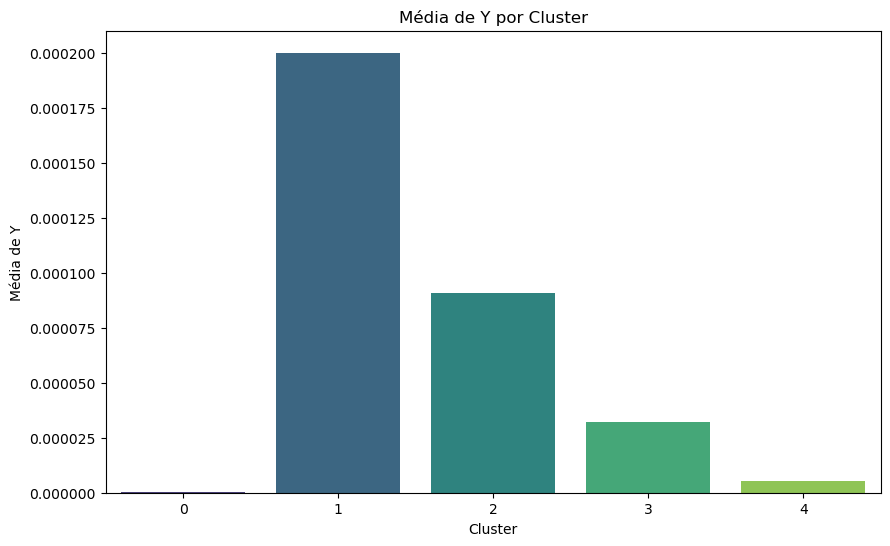

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aplicar K-Means com 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Y']])

# Agregar a média de Y por cluster
df_clustered = df.groupby('Cluster')['Y'].mean().reset_index()

# Criar gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=df_clustered, x='Cluster', y='Y', palette='viridis')

# Personalizar o gráfico
plt.title('Média de Y por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Média de Y')
plt.show()


In [103]:
# Exibindo as coordenadas dos centros dos clusters
print("Centros dos Clusters:")
kmeans.cluster_centers_

Centros dos Clusters:


array([[1.17892378e-07],
       [2.00000000e-04],
       [9.09000000e-05],
       [3.20000000e-05],
       [5.43416667e-06]])

In [104]:
# Exibindo as contagens de cada cluster
print("Contagem de amostras por cluster:")
df['Cluster'].value_counts()

Contagem de amostras por cluster:


Cluster
0    329
4     12
3      2
1      1
2      1
Name: count, dtype: int64

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Vetorizar as sequências de proteínas dos anticorpos e antígenos
vectorizer = TfidfVectorizer(max_features=100)  # Podemos ajustar max_features conforme necessário

# Transformando as sequências de anticorpos e antígenos em características numéricas
X_antibody = vectorizer.fit_transform(df['Antibody'].astype(str))  # Convertendo para string caso haja valores nulos
X_antigen = vectorizer.fit_transform(df['Antigen'].astype(str))

# Concatenar as duas matrizes de recursos (anticorpo e antígeno)
from scipy.sparse import hstack
X_combined = hstack([X_antibody, X_antigen])

# Definir a variável alvo (y) - pode ser Y ou Y_normalized
y = df['Y_normalized']  # Ou df['Y'], dependendo da sua escolha

# Dividir os dados em treino e teste (80% treino e 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

print(f"Tamanho dos dados de treino: {X_train.shape}")
print(f"Tamanho dos dados de teste: {X_test.shape}")


Tamanho dos dados de treino: (276, 200)
Tamanho dos dados de teste: (69, 200)


In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Inicializando o modelo de Regressão Linear
model = LinearRegression()

# Treinando o modelo com os dados de treino
model.fit(X_train, y_train)

# Prevendo os valores com os dados de teste
y_pred = model.predict(X_test)

# Calculando o erro quadrático médio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.015197902342812002


In [107]:
from sklearn.ensemble import RandomForestRegressor

# Inicializando o modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Treinando o modelo
rf_model.fit(X_train, y_train)

# Fazendo predições
y_pred_rf = rf_model.predict(X_test)

# Calculando o erro quadrático médio (MSE)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest Mean Squared Error: {mse_rf}")


Random Forest Mean Squared Error: 0.015227306961348325


In [108]:
from sklearn.ensemble import GradientBoostingRegressor

# Inicializando o modelo de Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Treinando o modelo
gb_model.fit(X_train, y_train)

# Fazendo predições
y_pred_gb = gb_model.predict(X_test)

# Calculando o erro quadrático médio (MSE)
mse_gb = mean_squared_error(y_test, y_pred_gb)
print(f"Gradient Boosting Mean Squared Error: {mse_gb}")


Gradient Boosting Mean Squared Error: 0.015252175965101207


In [109]:
from sklearn.svm import SVR

# Inicializando o modelo SVR
svr_model = SVR(kernel='rbf')  # Usando kernel radial basis (RBF)

# Treinando o modelo
svr_model.fit(X_train, y_train)

# Fazendo predições
y_pred_svr = svr_model.predict(X_test)

# Calculando o erro quadrático médio (MSE)
mse_svr = mean_squared_error(y_test, y_pred_svr)
print(f"SVR Mean Squared Error: {mse_svr}")


SVR Mean Squared Error: 0.021333705483323355


In [110]:
from sklearn.tree import DecisionTreeRegressor

# Inicializando o modelo de Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)

# Treinando o modelo
dt_model.fit(X_train, y_train)

# Fazendo predições
y_pred_dt = dt_model.predict(X_test)

# Calculando o erro quadrático médio (MSE)
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f"Decision Tree Mean Squared Error: {mse_dt}")


Decision Tree Mean Squared Error: 0.01522947468971047


In [111]:
# Resumo dos resultados
results = {
    'Linear Regression': mse,
    'Random Forest': mse_rf,
    'Gradient Boosting': mse_gb,
    'SVR': mse_svr,
    'Decision Tree': mse_dt,

}

# Exibindo os resultados ordenados
sorted_results = sorted(results.items(), key=lambda x: x[1])
for model, mse_value in sorted_results:
    print(f"{model}: {mse_value}")


Linear Regression: 0.015197902342812002
Random Forest: 0.015227306961348325
Decision Tree: 0.01522947468971047
Gradient Boosting: 0.015252175965101207
SVR: 0.021333705483323355
